# Non-invasive Sex Identification of T. granosa Using Machine Learning

# **PREPROCESSING**

## Setting up environment

In [1]:
## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
%matplotlib inline

## Preprocessing
from sklearn.preprocessing import MinMaxScaler

## Load and Preprocess Data

MALE DATASET PREPROCESSING

In [2]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left
0,110004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
1,120004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
2,130004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
3,140004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
4,150004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
...,...,...,...,...,...,...,...,...,...
859,110261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
860,120261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
861,130261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
862,140261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65


Dropping unused columns

In [3]:
male_litob = male_litob.drop(columns=['Umbos Right', 'Umbos Left'])
male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21,28.5,3.05
1,120004,43.1,33.05,28.15,21,28.5,3.05
2,130004,43.1,33.05,28.15,21,28.5,3.05
3,140004,43.1,33.05,28.15,21,28.5,3.05
4,150004,43.1,33.05,28.15,21,28.5,3.05
...,...,...,...,...,...,...,...
859,110261,47.2,31.65,32.05,21,33.7,3.65
860,120261,47.2,31.65,32.05,21,33.7,3.65
861,130261,47.2,31.65,32.05,21,33.7,3.65
862,140261,47.2,31.65,32.05,21,33.7,3.65


Dropping nan values

In [4]:
## drops nan
male_litob = male_litob.dropna()
male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21,28.5,3.05
1,120004,43.1,33.05,28.15,21,28.5,3.05
2,130004,43.1,33.05,28.15,21,28.5,3.05
3,140004,43.1,33.05,28.15,21,28.5,3.05
4,150004,43.1,33.05,28.15,21,28.5,3.05
...,...,...,...,...,...,...,...
860,120261,47.2,31.65,32.05,21,33.7,3.65
861,130261,47.2,31.65,32.05,21,33.7,3.65
862,140261,47.2,31.65,32.05,21,33.7,3.65
863,150261,47.2,31.65,32.05,21,33.7,3.65


Create other features a. LW_ratio and b. LH_ratio

In [5]:
## feature engineering
male_litob['LW_ratio']= male_litob['Length'] / male_litob['Width']
male_litob['LH_ratio'] = male_litob['Length'] / male_litob['Height']
male_litob['WH_ratio'] = male_litob['Width'] / male_litob['Height']
# male_litob['DU_ratio'] = male_litob['Distance Umbos'] / male_litob['Height']
male_litob['UL_ratio'] = male_litob['Distance Umbos'] / male_litob['Length']
male_litob['HL_ratio'] = male_litob['Length (Hinge Line)'] / male_litob['Length']
male_litob['UH_ratio'] = male_litob['Distance Umbos'] / male_litob['Height']
male_litob['Rib Density'] = male_litob['Rib count'] / male_litob['Length']

male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density
0,110004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766,0.661253,0.108348,0.487239
1,120004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766,0.661253,0.108348,0.487239
2,130004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766,0.661253,0.108348,0.487239
3,140004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766,0.661253,0.108348,0.487239
4,150004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766,0.661253,0.108348,0.487239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,120261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331,0.713983,0.113885,0.444915
861,130261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331,0.713983,0.113885,0.444915
862,140261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331,0.713983,0.113885,0.444915
863,150261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331,0.713983,0.113885,0.444915


Preprocessing to keep only the unique instances

In [6]:
## extracts last 3 digits since its unique in dataset

male_litob["Base_ID"] = male_litob["Litob_id"] % 1000

## keeps only the first occurrence of each Base_ID
male_litob_unique = male_litob.drop_duplicates(subset="Base_ID", keep="first").drop(columns=["Base_ID"])

# keep only rows where Litob_id starts with 110XXX
male_litob_unique = male_litob_unique[male_litob_unique["Litob_id"] // 1000 == 110]
male_litob_unique.drop(columns=['Unnamed:0'], inplace=True, errors='ignore')

male_litob_unique.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density
0,110004,43.10,33.05,28.15,21,28.50,3.05,1.304085,1.531083,1.174067,0.070766,0.661253,0.108348,0.487239
6,110005,41.10,31.05,27.60,20,23.05,3.35,1.323671,1.489130,1.125000,0.081509,0.560827,0.121377,0.486618
12,110006,43.20,33.45,29.35,20,29.35,3.30,1.291480,1.471891,1.139693,0.076389,0.679398,0.112436,0.462963
18,110007,41.50,32.55,27.70,20,24.10,3.70,1.274962,1.498195,1.175090,0.089157,0.580723,0.133574,0.481928
24,110008,42.20,33.05,27.70,21,24.05,2.05,1.276853,1.523466,1.193141,0.048578,0.569905,0.074007,0.497630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,110256,50.30,37.05,37.05,20,32.20,4.30,1.357625,1.357625,1.000000,0.085487,0.640159,0.116059,0.397614
835,110257,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145,0.668412,0.192458,0.349040
841,110258,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896,0.683987,0.118943,0.402969
847,110259,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785,0.664344,0.130125,0.441347


Checking and debugging purposes

In [7]:
male_litob_unique.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio',
       'WH_ratio', 'UL_ratio', 'HL_ratio', 'UH_ratio', 'Rib Density'],
      dtype='object')

In [8]:
# from google.colab import files
# male_litob_unique.to_csv('male_litob_unique.csv', encoding = 'utf-8-sig')
# files.download('male_litob_unique.csv')

FEMALE DATASET PREPROCESSING

In [9]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/female.csv"
female_litob = pd.read_csv(female_url)

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left
0,10001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
1,20001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
2,30001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
3,40001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
4,50001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
755,10271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
756,20271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
757,30271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
758,40271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3


Dropping unused columns

In [10]:
## drops umbos right and left
female_litob = female_litob.drop(columns=['Umbos Right', 'Umbos Left'])
female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.1
1,20001,48.05,37.60,32.15,20,33.55,4.1
2,30001,48.05,37.60,32.15,20,33.55,4.1
3,40001,48.05,37.60,32.15,20,33.55,4.1
4,50001,48.05,37.60,32.15,20,33.55,4.1
...,...,...,...,...,...,...,...
755,10271,50.05,36.55,35.05,20,33.70,4.6
756,20271,50.05,36.55,35.05,20,33.70,4.6
757,30271,50.05,36.55,35.05,20,33.70,4.6
758,40271,50.05,36.55,35.05,20,33.70,4.6


Dropping nan values

In [11]:
## drops NaN values
female_litob = female_litob.dropna()
female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.1
1,20001,48.05,37.60,32.15,20,33.55,4.1
2,30001,48.05,37.60,32.15,20,33.55,4.1
3,40001,48.05,37.60,32.15,20,33.55,4.1
4,50001,48.05,37.60,32.15,20,33.55,4.1
...,...,...,...,...,...,...,...
756,20271,50.05,36.55,35.05,20,33.70,4.6
757,30271,50.05,36.55,35.05,20,33.70,4.6
758,40271,50.05,36.55,35.05,20,33.70,4.6
759,50271,50.05,36.55,35.05,20,33.70,4.6


Adding features a. LW_ratio and LH_ratio

In [12]:
## calculating ratios

female_litob['LW_ratio']= female_litob['Length'] / female_litob['Width']
female_litob['LH_ratio'] = female_litob['Length'] / female_litob['Height']
female_litob['WH_ratio'] = female_litob['Width'] / female_litob['Height']
# female_litob['DU_ratio'] = female_litob['Distance Umbos'] / female_litob['Height']
female_litob['UL_ratio'] = female_litob['Distance Umbos'] / female_litob['Length']
female_litob['HL_ratio'] = female_litob['Length (Hinge Line)'] / female_litob['Length']
female_litob['UH_ratio'] = female_litob['Distance Umbos'] / female_litob['Height']
female_litob['Rib Density'] = female_litob['Rib count'] / female_litob['Length']

female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density
0,10001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233
1,20001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233
2,30001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233
3,40001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233
4,50001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,20271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908,0.673327,0.131241,0.399600
757,30271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908,0.673327,0.131241,0.399600
758,40271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908,0.673327,0.131241,0.399600
759,50271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908,0.673327,0.131241,0.399600


Keeping unique instances in female dataset

In [13]:
## extracts last 3 digits since its unique in dataset
female_litob["Base_ID"] = female_litob["Litob_id"] % 1000

## keeps only the first occurrence of each Base_ID
female_litob_unique = female_litob.drop_duplicates(subset="Base_ID", keep="first").drop(columns=["Base_ID"])

# keep only rows where Litob_id starts with 01XXX
female_litob_unique = female_litob_unique[female_litob_unique["Litob_id"].astype(str).str.startswith("1")]
female_litob_unique.drop(columns=['Unnamed:0'], inplace=True, errors='ignore')

female_litob_unique.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233
6,10002,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0.698312,0.094574,0.421941
12,10003,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0.740185,0.144000,0.484988
18,10075,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0.600400,0.127925,0.419580
24,10076,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0.729193,0.104938,0.496894


Checking and debugging purposes

In [14]:
female_litob_unique.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio',
       'WH_ratio', 'UL_ratio', 'HL_ratio', 'UH_ratio', 'Rib Density'],
      dtype='object')

In [15]:
#from google.colab import files
#female_litob_unique.to_csv('female_litob_unique.csv', encoding = 'utf-8-sig')
#files.download('female_litob_unique.csv')

## Assigning labels to the male and female where female = 0 and male = 1

In [16]:
## labels assigned
female_litob_unique['Label'] = 0
male_litob_unique['Label'] = 1

In [17]:
## combining male and female datasets
litob_combined = pd.concat([female_litob_unique, male_litob_unique], ignore_index=True)
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density,Label
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233,0
1,10002,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0.698312,0.094574,0.421941,0
2,10003,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0.740185,0.144000,0.484988,0
3,10075,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0.600400,0.127925,0.419580,0
4,10076,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0.729193,0.104938,0.496894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,110257,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145,0.668412,0.192458,0.349040,1
267,110258,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896,0.683987,0.118943,0.402969,1
268,110259,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785,0.664344,0.130125,0.441347,1
269,110260,52.40,39.05,36.05,21,34.20,4.05,1.341869,1.453537,1.083218,0.077290,0.652672,0.112344,0.400763,1


remove the litob id

In [18]:
##  remove Litob_id column

if 'Litob_id' in litob_combined.columns:
    litob_combined = litob_combined.drop('Litob_id', axis=1)

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density,Label
0,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233,0
1,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0.698312,0.094574,0.421941,0
2,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0.740185,0.144000,0.484988,0
3,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0.600400,0.127925,0.419580,0
4,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0.729193,0.104938,0.496894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145,0.668412,0.192458,0.349040,1
267,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896,0.683987,0.118943,0.402969,1
268,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785,0.664344,0.130125,0.441347,1
269,52.40,39.05,36.05,21,34.20,4.05,1.341869,1.453537,1.083218,0.077290,0.652672,0.112344,0.400763,1


In [19]:
# from google.colab import files
# litob_combined.to_csv('litob_combined.csv', encoding = 'utf-8-sig')
# files.download('litob_combined.csv')

## Data Exploration

Features assigned


In [20]:
## assigning features
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio', 'WH_ratio', 'UL_ratio', 'HL_ratio', 'UH_ratio', 'Rib Density']
litob_combined[features].head()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density
0,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0.698231,0.127527,0.416233
1,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0.698312,0.094574,0.421941
2,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0.740185,0.144000,0.484988
3,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0.600400,0.127925,0.419580
4,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0.729193,0.104938,0.496894


STATISTICAL TESTS

Displaying the distribution, test used, and the implication if there is significant difference or not

In [21]:
from scipy.stats import shapiro, mannwhitneyu

## alpha level
alpha = 0.05

## features iterated
for feature in features:

    ## normality test
    shapiro_test = shapiro(litob_combined[feature])

    ## display Shapiro-Wilk test results
    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue:.3f}")  # Display with 10 decimal places

    ## interpret the normality test
    if shapiro_test.pvalue > alpha:
        print("Data is normally distributed. Proceeding with independent sample T-test.")

        ## normally distributed, perform an independent sample T-test
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        ## normally distributed = t-test
        print(f"T-test for {feature} not implemented in this code snippet.")
    else:
        ## not normally distributed = mann whitney
        print("Data is not normally distributed. Proceeding with Mann-Whitney U test.")
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        # mann-Whitney U test
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')

        # result MUT
        print(f"Mann-Whitney U Test Statistic: {statistic}")
        print(f"P-value: {p_value:.3f}")

        # interpreting result
        if p_value > alpha:
            print(f"There is no significant difference between the {feature} of male and female litob.\n")
        else:
            print(f"There is a significant difference between the {feature} of male and female litob.\n")


Feature: Length
Shapiro-Wilk Test Statistic: 0.2139524789334406
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8522.0
P-value: 0.334
There is no significant difference between the Length of male and female litob.

Feature: Width
Shapiro-Wilk Test Statistic: 0.9666884968156662
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8941.0
P-value: 0.753
There is no significant difference between the Width of male and female litob.

Feature: Height
Shapiro-Wilk Test Statistic: 0.9530418377444827
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8154.5
P-value: 0.124
There is no significant difference between the Height of male and female litob.

Feature: Rib count
Shapiro-Wilk Test Statistic: 0.8765733184278433
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U tes

Dataframe version

In [22]:
## store results
results = []

## iterate through features
for feature in features:

    # normality test
    shapiro_test = shapiro(litob_combined[feature])
    distribution = "Normal" if shapiro_test.pvalue > alpha else "Non-normal"

    # Perform appropriate test
    male_data = litob_combined[litob_combined['Label'] == 1][feature]
    female_data = litob_combined[litob_combined['Label'] == 0][feature]

    if distribution == "Normal":
        test_used = "T-test (not implemented)"
        p_value = None
        implication = "T-test not performed"
    else:
        test_used = "Mann-Whitney U test"
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
        implication = "Significant difference" if p_value <= alpha else "No significant difference"

    # append to results list
    results.append([feature, distribution, test_used, p_value, implication])

# result to df
results_df = pd.DataFrame(results, columns=["Variable Name", "Distribution", "Test used", "p-value", "Implication"])
results_df

,Variable Name,Distribution,Test used,p-value,Implication
0,Length,Non-normal,Mann-Whitney U test,0.334358,No significant difference
1,Width,Non-normal,Mann-Whitney U test,0.753102,No significant difference
2,Height,Non-normal,Mann-Whitney U test,0.124484,No significant difference
3,Rib count,Non-normal,Mann-Whitney U test,0.250530,No significant difference
4,Length (Hinge Line),Non-normal,Mann-Whitney U test,0.119601,No significant difference
5,Distance Umbos,Non-normal,Mann-Whitney U test,0.024556,Significant difference
6,LW_ratio,Non-normal,Mann-Whitney U test,0.010786,Significant difference
7,LH_ratio,Non-normal,Mann-Whitney U test,0.489948,No significant difference
8,WH_ratio,Non-normal,Mann-Whitney U test,0.003239,Significant difference
9,UL_ratio,Non-normal,Mann-Whitney U test,0.019330,Significant difference


## Scaling the values

In [23]:
from sklearn.preprocessing import MinMaxScaler

##  columns to scale excluding the label
cols_to_scale = ['Length', 'Width', 'Height', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio', 'WH_ratio', 'UL_ratio', 'HL_ratio', 'UH_ratio', 'Rib Density']

scaler = MinMaxScaler()

# fit and transform the selected columns
litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density,Label
0,0.026072,0.429735,0.339114,20,0.492701,0.089706,0.012637,0.025299,0.534534,0.110156,0.787612,0.090104,0.771237,0
1,0.024378,0.221996,0.342967,20,0.476277,0.058824,0.026616,0.023227,0.237762,0.078022,0.787715,0.059395,0.783174,0
2,0.013688,0.287169,0.304432,21,0.437956,0.101471,0.012008,0.016191,0.390854,0.138640,0.840718,0.105454,0.915021,0
3,0.031287,0.325866,0.335260,21,0.364964,0.089706,0.024254,0.030905,0.395264,0.104934,0.663774,0.090474,0.778237,0
4,0.005736,0.264766,0.348748,20,0.339416,0.069118,0.006581,0.004210,0.288657,0.108846,0.826804,0.069053,0.939919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.050189,0.639511,0.581888,20,0.666058,0.186765,0.017471,0.024939,0.428708,0.177263,0.749866,0.150611,0.630721,1
267,0.023726,0.380855,0.412331,19,0.445255,0.088235,0.013985,0.016118,0.350156,0.111027,0.769582,0.082104,0.743499,1
268,0.013036,0.181263,0.181118,19,0.312044,0.076471,0.019508,0.028660,0.449184,0.109325,0.744716,0.092524,0.823757,1
269,0.037414,0.488798,0.489403,21,0.516423,0.088235,0.017588,0.021870,0.376210,0.097847,0.729942,0.075955,0.738886,1


## Downloading the final dataset

In [24]:
# from google.colab import files
# litob_combined.to_csv('litob_combined.csv', index=False)
# files.download('litob_combined.csv')

## Dataset Inspection and Visualizations

In [25]:
## checking columns
litob_combined.columns

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'LW_ratio', 'LH_ratio', 'WH_ratio', 'UL_ratio',
       'HL_ratio', 'UH_ratio', 'Rib Density', 'Label'],
      dtype='object')

Histogram

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Rib count'}>],
       [<Axes: title={'center': 'Length (Hinge Line)'}>,
        <Axes: title={'center': 'Distance Umbos'}>,
        <Axes: title={'center': 'LW_ratio'}>,
        <Axes: title={'center': 'LH_ratio'}>],
       [<Axes: title={'center': 'WH_ratio'}>,
        <Axes: title={'center': 'UL_ratio'}>,
        <Axes: title={'center': 'HL_ratio'}>,
        <Axes: title={'center': 'UH_ratio'}>],
       [<Axes: title={'center': 'Rib Density'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

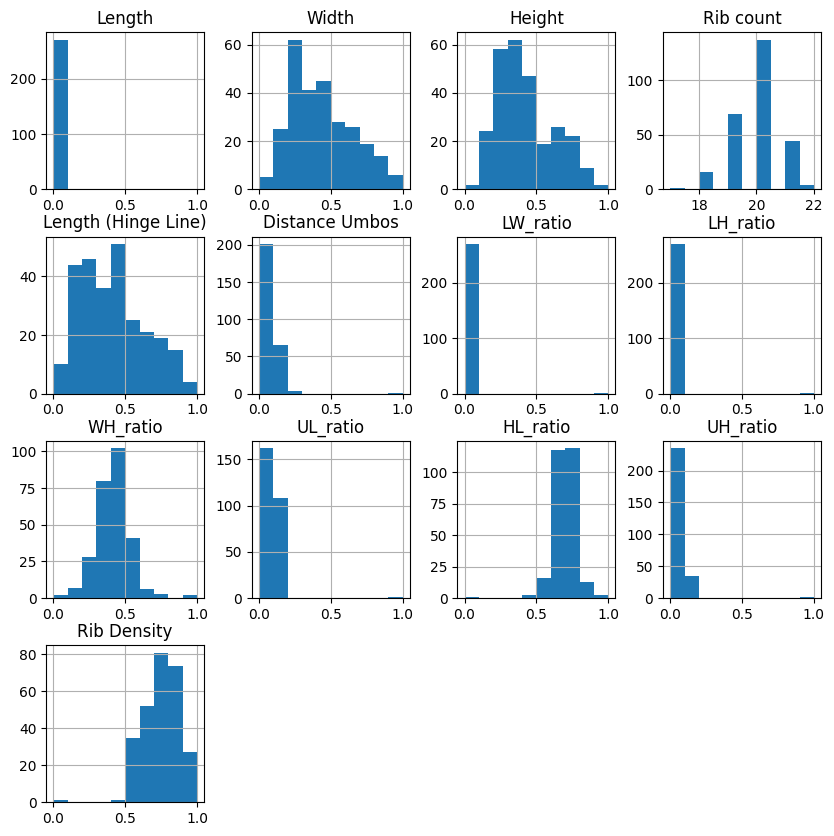

In [26]:
litob_combined_explore = litob_combined.drop(columns=['Label'], errors = 'ignore')
litob_combined_explore.hist(figsize = (10, 10))

Exploring the mean, std and etc


In [27]:
litob_combined_explore.describe()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.033792,0.438462,0.420663,19.808118,0.412619,0.079634,0.019017,0.025346,0.418409,0.092937,0.696968,0.072259,0.748037
std,0.061737,0.219016,0.195854,0.843323,0.223435,0.070245,0.060042,0.059860,0.119395,0.065627,0.083348,0.064369,0.124152
min,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014796,0.253564,0.280347,19.000000,0.229927,0.045588,0.012346,0.017409,0.355640,0.065504,0.647894,0.047764,0.663727
50%,0.027767,0.407332,0.375723,20.000000,0.385036,0.070588,0.014957,0.022010,0.428708,0.089451,0.697899,0.070304,0.753491
75%,0.041716,0.586558,0.540462,20.000000,0.556569,0.101471,0.017914,0.026425,0.484569,0.110056,0.752395,0.086236,0.849253
max,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
litob_combined.Label.value_counts()

,count
Label,
1,144
0,127


CHECKING FOR CLASS IMBALANCE

In [29]:
class_counts = litob_combined['Label'].value_counts()

## percentage of each class
class_percentages = class_counts / len(litob_combined) * 100
class_percentages

,count
Label,
1,53.136531
0,46.863469


Samples count visualizations

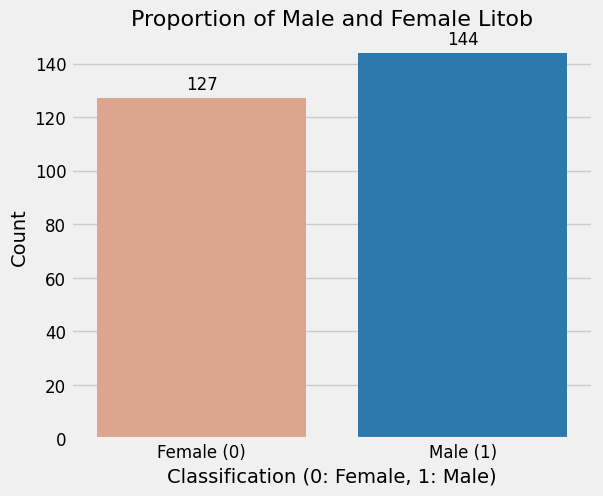

Proportions of Classes:


,count
Label,
1,0.531365
0,0.468635


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))

colors = {0: "#e9a080", 1: "#187cc1"}

ax = sns.countplot(x='Label', data=litob_combined, hue='Label', palette=colors, legend=False)
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),  # Converted to int
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

counts = litob_combined.Label.value_counts()
proportions = counts / counts.sum()
print('Proportions of Classes:')
proportions

CHECKING CORRELATION

In [31]:
litob_features = litob_combined.columns.drop(['Label'])
x = litob_combined[litob_features]
y = litob_combined['Label']

variable_corr = pd.concat([x, y], axis=1)
variable_corr

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,HL_ratio,UH_ratio,Rib Density,Label
0,0.026072,0.429735,0.339114,20,0.492701,0.089706,0.012637,0.025299,0.534534,0.110156,0.787612,0.090104,0.771237,0
1,0.024378,0.221996,0.342967,20,0.476277,0.058824,0.026616,0.023227,0.237762,0.078022,0.787715,0.059395,0.783174,0
2,0.013688,0.287169,0.304432,21,0.437956,0.101471,0.012008,0.016191,0.390854,0.138640,0.840718,0.105454,0.915021,0
3,0.031287,0.325866,0.335260,21,0.364964,0.089706,0.024254,0.030905,0.395264,0.104934,0.663774,0.090474,0.778237,0
4,0.005736,0.264766,0.348748,20,0.339416,0.069118,0.006581,0.004210,0.288657,0.108846,0.826804,0.069053,0.939919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.050189,0.639511,0.581888,20,0.666058,0.186765,0.017471,0.024939,0.428708,0.177263,0.749866,0.150611,0.630721,1
267,0.023726,0.380855,0.412331,19,0.445255,0.088235,0.013985,0.016118,0.350156,0.111027,0.769582,0.082104,0.743499,1
268,0.013036,0.181263,0.181118,19,0.312044,0.076471,0.019508,0.028660,0.449184,0.109325,0.744716,0.092524,0.823757,1
269,0.037414,0.488798,0.489403,21,0.516423,0.088235,0.017588,0.021870,0.376210,0.097847,0.729942,0.075955,0.738886,1


In [32]:
## correlation
correlation_matrix = variable_corr.corr()

label_correlations = correlation_matrix['Label'].drop('Label')
sorted_correlations = label_correlations.abs().sort_values(ascending=False)
sorted_correlations

,Label
WH_ratio,0.179385
UL_ratio,0.118159
Distance Umbos,0.116598
UH_ratio,0.104192
HL_ratio,0.103987
Length (Hinge Line),0.095076
Height,0.087302
Rib count,0.075821
Rib Density,0.066844
LH_ratio,0.061386


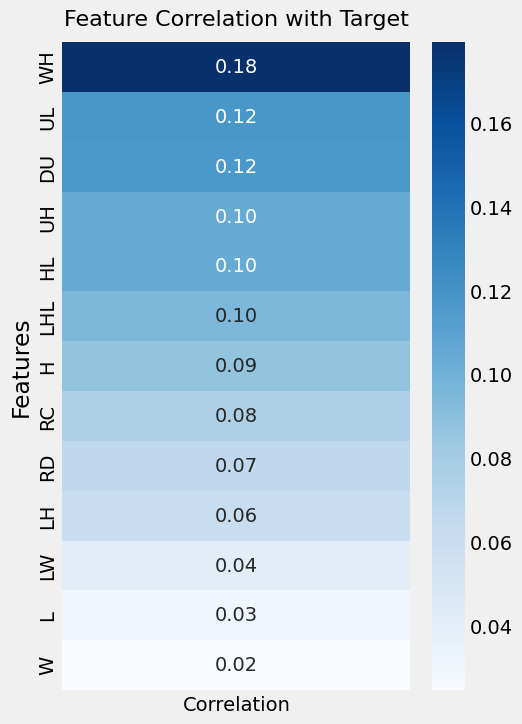

In [33]:
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'Label': 'Label',
    'WH_ratio':'WH',
    'UL_ratio':'UL',
    'HL_ratio': 'HL',
    'UH_ratio': 'UH',
    'Rib Density': 'RD'
}

label_correlations = correlation_matrix['Label'].drop('Label')
sorted_correlations = label_correlations.abs().sort_values(ascending=False)

# Create a DataFrame for the heatmap with the index as the features
label_correlations_df = pd.DataFrame(sorted_correlations)  # Convert Series to DataFrame
label_correlations_df = label_correlations_df.rename(columns={'Label': 'Correlation'}) #rename col

# Replace index with codenames in label_correlations_df
label_correlations_df.index = label_correlations_df.index.map(codenames)

# Get the minimum and maximum correlation values
vmin = label_correlations_df['Correlation'].min()
vmax = label_correlations_df['Correlation'].max()

# Plot heatmap
plt.figure(figsize=(5, 8))
sns.heatmap(label_correlations_df, annot=True, cmap='Blues', vmin=vmin, vmax=vmax, fmt=".2f", linewidths=0)  # Set vmin and vmax

# Set labels and title
plt.title('Feature Correlation with Target', fontsize=16, pad=12)
plt.ylabel('Features')

# Show the plot
plt.show()

CHECK FOR MULTICOLLINEARITY

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Create a new DataFrame with the selected features
X = female_litob[features]

# Add a constant column to include the intercept in the VIF calculation
X_const = add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display VIF values
print(vif)

                Feature            VIF
0                 const  102082.408146
1                Length    1107.003094
2                 Width     785.761118
3                Height     730.505628
4             Rib count       6.186727
5   Length (Hinge Line)     337.679212
6        Distance Umbos     467.005950
7              LW_ratio     152.750895
8              LH_ratio     187.888021
9              WH_ratio     196.731568
10             UL_ratio     524.983111
11             HL_ratio      64.068101
12             UH_ratio     594.753299
13          Rib Density      59.152989


Correlation map

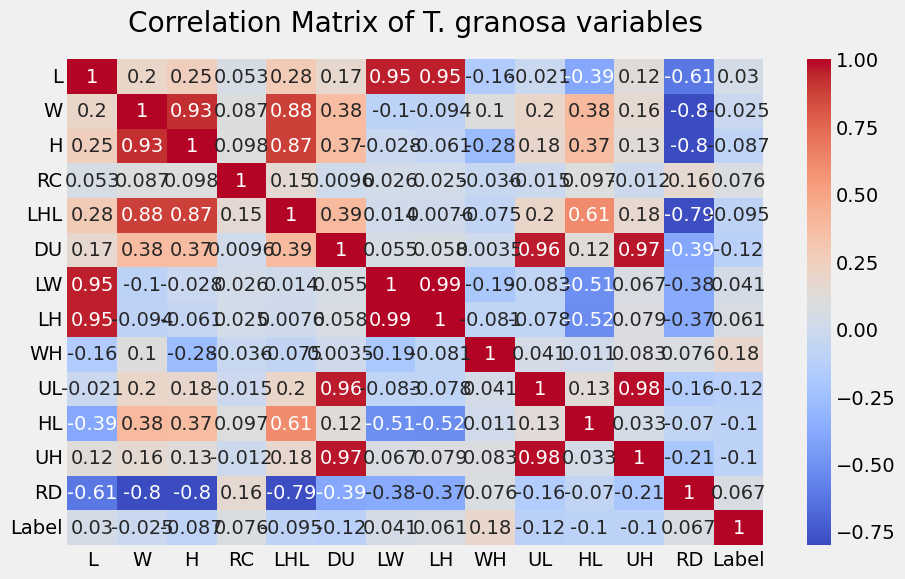

In [35]:
## col names and codenames
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'Label': 'Label',
    'WH_ratio':'WH',
    'UL_ratio':'UL',
    'HL_ratio': 'HL',
    'UH_ratio': 'UH',
    'Rib Density': 'RD'
}

variable_corr = variable_corr.rename(columns=codenames)

## display heatmap
corr = variable_corr.corr()
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of T. granosa variables', pad=20)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [36]:
import numpy as np
from scipy.stats import kruskal

X = litob_combined.drop('Label', axis=1)
y = litob_combined['Label']

def kruskal_wallis_feature_importance(X, y):
    feature_importance_scores = {}
    for feature in X.columns:
        groups = [X[feature][y == label] for label in y.unique()]
        statistic, p_value = kruskal(*groups)
        feature_importance_scores[feature] = statistic

    return pd.Series(feature_importance_scores).sort_values(ascending=False)

feature_importance_scores = kruskal_wallis_feature_importance(X, y)
print(feature_importance_scores)

WH_ratio               8.672089
LW_ratio               6.504200
UL_ratio               5.471403
Distance Umbos         5.058455
UH_ratio               4.396583
HL_ratio               3.094024
Length (Hinge Line)    2.424954
Height                 2.362369
Rib Density            1.794630
Rib count              1.322285
Length                 0.933445
LH_ratio               0.477713
Width                  0.099432
dtype: float64


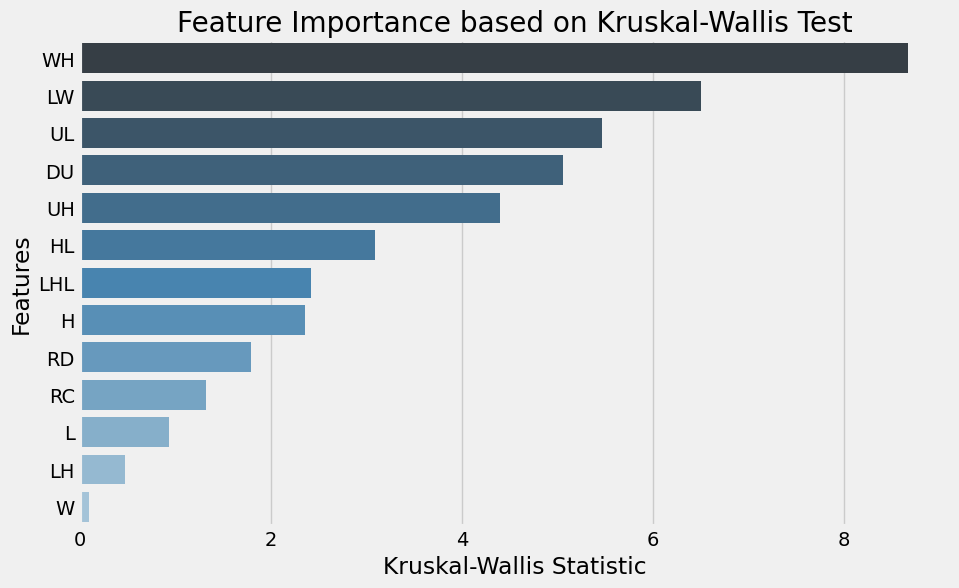

In [37]:
# Plotting the feature importance scores

## sorting for visualizations

codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'Label': 'Label',
    'WH_ratio':'WH',
    'UL_ratio':'UL',
    'HL_ratio': 'HL',
    'UH_ratio': 'UH',
    'Rib Density': 'RD'
}

sorted_features = feature_importance_scores.sort_values(ascending=False)
colors = sns.color_palette("Blues_d", len(sorted_features))
colors = colors[::-1]  # Reverse the color palette

plt.figure(figsize=(10, 6))

# Map codenames to sorted_features.index
sorted_features.index = sorted_features.index.map(codenames)

sns.barplot(x=sorted_features.values, y=sorted_features.index, hue = sorted_features.index, palette=colors,dodge=False,legend=False)
plt.xlabel("Kruskal-Wallis Statistic")
plt.ylabel("Features")
plt.title("Feature Importance based on Kruskal-Wallis Test")
plt.show()

DATA GROUPED BASED ON LABEL

In [38]:
## mean and sd by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])
grouped_data

Length               Width              Height            Rib count  \
           mean       std      mean       std      mean       std       mean   
Label                                                                          
0      0.031794  0.019532  0.444184  0.230683  0.438836  0.199556  19.740157   
1      0.035554  0.082786  0.433415  0.208868  0.404635  0.191795  19.868056   

                Length (Hinge Line)            ...  WH_ratio            \
            std                mean       std  ...      mean       std   
Label                                          ...                       
0      0.837727            0.435197  0.228881  ...  0.395645  0.107385   
1      0.846602            0.392706  0.217370  ...  0.438485  0.126050   

       UL_ratio            HL_ratio            UH_ratio           Rib Density  \
           mean       std      mean       std      mean       std        mean   
Label                                                                           
0      0.101179  0.086282  0.706180  0.073049  0.079388  0.086851    0.739217   
1      0.085668  0.038195  0.688844  0.090955  0.065973  0.033041    0.755816   

                 
            std  
Label            
0      0.120273  
1      0.127385  

[2 rows x 26 columns]

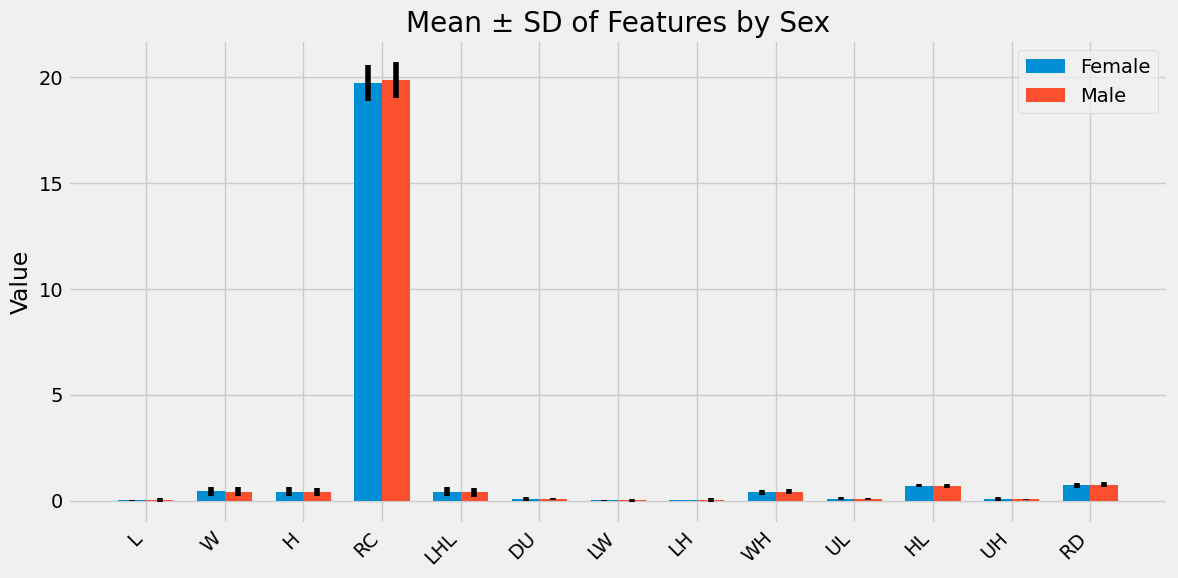

In [39]:
## mean and std by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])

## plots
plt.figure(figsize=(12, 6))
x = range(len(features))
width = 0.35
for i, sex in enumerate([0, 1]):  ## iterate through male and female

    ## multiIndex column names -> accessing colnames
    # Use list comprehension to access all means in the correct order
    means = grouped_data.loc[sex, [(feature, 'mean') for feature in features]]
    # Use list comprehension to access all stds in the correct order
    stds = grouped_data.loc[sex, [(feature, 'std') for feature in features]]
    plt.bar([xi + i * width for xi in x], means, width, yerr=stds, label=f"{'Female' if sex == 0 else 'Male'}")

## codenames x-axis labels
# Add all codenames to the dictionary.
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'WH_ratio':'WH',
    'UL_ratio':'UL',
    'HL_ratio': 'HL',
    'UH_ratio': 'UH',
    'Rib Density': 'RD'
}
plt.xticks([xi + width / 2 for xi in x], [codenames.get(feature, feature) for feature in features], rotation=45, ha="right") # Use get to handle missing keys

plt.ylabel("Value")
plt.title("Mean ± SD of Features by Sex")
plt.legend()
plt.tight_layout()
plt.show()

## Handling Imbalanced Dataset

In [40]:
# ! pip install -U imbalanced-learn

In [41]:
X = litob_combined.drop(['Label'], axis=1)
y = litob_combined['Label']

In [42]:
y.value_counts()

,count
Label,
1,144
0,127


<Axes: ylabel='count'>

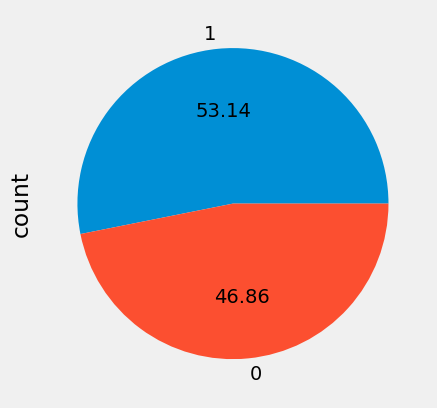

In [43]:
# Show pie plot
y.value_counts().plot.pie(autopct='%.2f')

##### Random Oversampling

In [44]:
# # "not majority" = resample all classes but the majority class

# from imblearn.over_sampling import RandomOverSampler

# #ros = RandomOverSampler(sampling_strategy=1) # Float
# ros = RandomOverSampler(sampling_strategy="not majority") # String
# X_res, y_res = ros.fit_resample(X, y)

# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Over-sampling")

In [45]:
# from google.colab import files

# oversampled_data = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

# # Check if the DataFrame has 288 samples
# if len(oversampled_data) == 288:
#   print("Dataset has 288 samples. Downloading...")
#   oversampled_data.to_csv('oversampled_dataset.csv', index=False)
#   files.download('oversampled_dataset.csv')
# else:
#   print(f"Error: The dataset has {len(oversampled_data)} samples, not 288.")

In [46]:
# y_res.value_counts()

##### SMOTE

In [47]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Define X and y
# X = litob_combined.drop(['Label'], axis=1)
# y = litob_combined['Label']

# # Check class distribution before SMOTE
# counter = Counter(y)
# print('Before SMOTE:', counter)

# # Apply SMOTE to the training data
# smt = SMOTE()
# X_sm, y_sm = smt.fit_resample(X, y)

# # Check class distribution after SMOTE
# counter_after = Counter(y_sm)
# print('After SMOTE:', counter_after)

In [48]:
# litob_combined_smote = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.Series(y_sm, name='Label')], axis=1)

# # Save the SMOTE-applied dataset to a CSV file
# litob_combined_smote.to_csv('litob_smote.csv', index=False)
# files.download('litob_smote.csv')

##### ADASYN

In [49]:
# from collections import Counter
# from imblearn.over_sampling import ADASYN

# # Check class distribution
# class_counts = Counter(y)
# print(f"Original class counts: {class_counts}")

# # Only apply ADASYN if dataset is imbalanced
# if min(class_counts.values()) / max(class_counts.values()) > 0.8:
#     print("Dataset is already balanced, skipping ADASYN.")
#     X_ada, y_ada = X, y  # No need for resampling
# else:
#     ada = ADASYN(sampling_strategy=1.0, random_state=42)
#     X_ada, y_ada = ada.fit_resample(X, y)

# # Check new class distribution
# print(f"New class counts: {Counter(y_ada)}")

##### Hybridization: SMOTE + Tomek Links

In [50]:
# from imblearn.combine import SMOTETomek
# from collections import Counter

# # Define X and y
# X = litob_combined.drop(['Label'], axis=1)
# y = litob_combined['Label']

# # Counting the number of instances in each class before oversampling
# counter = Counter(y)
# print('Before', counter)

# # Oversampling the train dataset using SMOTE + Tomek
# smtom = SMOTETomek(random_state=42)
# X_smtom, y_smtom = smtom.fit_resample(X, y)

# # Counting the number of instances in each class after oversampling
# counter_after = Counter(y_smtom)
# print('After', counter_after)

In [51]:
# litob_combined_smote = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.Series(y_sm, name='Label')], axis=1)

# # Save the SMOTE-applied dataset to a CSV file
# litob_combined_smote.to_csv('litob_smotetomek.csv', index=False)
# files.download('litob_smotetomek.csv')

In [52]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# # rus = RandomUnderSampler(sampling_strategy="not minority") # String
# X_res, y_res = rus.fit_resample(X, y)

# ax = y_res.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Under-sampling")

In [53]:
# # Class distribution
# y_res.value_counts()

In [54]:
# from google.colab import files

# undersampled_data = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

# # Check if the DataFrame has 254 samples
# if len(undersampled_data) == 254:
#   print("Dataset has 254 samples. Downloading...")
#   undersampled_data.to_csv('undersampled_dataset.csv', index=False)
#   files.download('undersampled_dataset.csv')
# else:
#   print(f"Error: The dataset has {len(undersampled_data)} samples, not 254.")

In [55]:
# Find indices of the last 17 male rows.
male_indices = litob_combined[litob_combined['Label'] == 1].index[-17:]

# Drop those rows.
litob_combined = litob_combined.drop(male_indices)

# Check the class balance.
print(litob_combined['Label'].value_counts())

Label
0    127
1    127
Name: count, dtype: int64


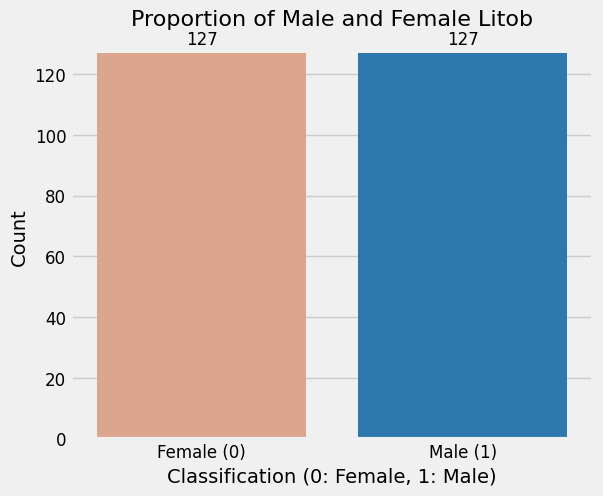

In [56]:
plt.figure(figsize=(6, 5))
colors = {0: "#e9a080", 1: "#187cc1"}
ax = sns.countplot(x='Label', data=litob_combined, hue='Label', palette=colors, legend=False)
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.show()


## **MODEL TRAINING**

##### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_res = litob_combined.drop(['Label'], axis=1)
y_res = litob_combined['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [58]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test)
model_accuracy  = accuracy_score(y_pred,Y_test)
print("The Accuracy of simple logistic regression without hyperparmeter:",model_accuracy * 100)

The Accuracy of simple logistic regression without hyperparmeter: 54.90196078431373


In [60]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

In [61]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [62]:
best_clf = clf.fit(X_res, y_res)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

LogisticRegression(C=4.281332398719396, max_iter=1000, penalty='l1',
                   solver='saga')

In [63]:
print(f'Accuracy: {best_clf.score(X_res, y_res) * 100:.3f}')

Accuracy: 66.535


##### Decision Trees

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_res = litob_combined.drop(['Label'], axis=1)
y_res = litob_combined['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Fitting a decision tree with default hyperparameters
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')
print("Training accuracy: ",tree.score(X_train,Y_train))
acc_score = accuracy_score(Y_test, pred_tree)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(Y_test, pred_tree)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(Y_test,pred_tree)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(Y_test,pred_tree)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  1.0
Testing accuracy:  0.47058823529411764
Confusion Matrix: 
 [[ 9 14]
 [13 15]]
ROC AUC score:  0.4635093167701863
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.39      0.40        23
           1       0.52      0.54      0.53        28

    accuracy                           0.47        51
   macro avg       0.46      0.46      0.46        51
weighted avg       0.47      0.47      0.47        51



In [66]:
#Setting values for the parameters
#n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(tree, hyperT, cv = 3, verbose = 1, n_jobs = -1)
# Changed x_train to X_train
bestT = gridT.fit(X_train, y_train) # Fixed: Using X_train instead of x_train

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [67]:
#Printing the best hyperparameters
print('The best hyper parameters are: \n',gridT.best_params_)

The best hyper parameters are: 
 {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [68]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
tree1 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5, min_samples_leaf=10,min_samples_split=5, max_features=10)
tree1.fit(X_train,y_train)
pred_tree1 = tree1.predict(X_test)

In [69]:
#Checking different metrics for decision tree model after tuning the hyperparameters
print('Checking different metrics for decision tree model after tuning the hyperparameters:\n')
print("Training accuracy: ",tree1.score(X_train,Y_train))
acc_score = accuracy_score(Y_test, pred_tree1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(Y_test, pred_tree1)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(Y_test,pred_tree1)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(Y_test,pred_tree1)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model after tuning the hyperparameters:

Training accuracy:  0.6798029556650246
Testing accuracy:  0.5294117647058824
Confusion Matrix: 
 [[14  9]
 [15 13]]
ROC AUC score:  0.5364906832298137
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.61      0.54        23
           1       0.59      0.46      0.52        28

    accuracy                           0.53        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.54      0.53      0.53        51



##### Support Vector Machine

In [70]:
from sklearn.model_selection import train_test_split

X_res = litob_combined.drop(['Label'], axis=1)
y_res = litob_combined['Label']

# Split the data:
X_train, X_test, y_train, y_test = train_test_split(X_res, np.ravel(y_res), test_size=0.2, random_state=42)

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# train the model on train set
model = SVC()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        23
           1       0.00      0.00      0.00        28

    accuracy                           0.45        51
   macro avg       0.23      0.50      0.31        51
weighted avg       0.20      0.45      0.28        51



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.439 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [73]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [74]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.53      0.70      0.60        23
           1       0.67      0.50      0.57        28

    accuracy                           0.59        51
   macro avg       0.60      0.60      0.59        51
weighted avg       0.61      0.59      0.59        51



COMPARISON OF MODELS' PERFORMANCE

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred) * 100
logreg_precision = precision_score(y_test, y_pred, average='macro') * 100
logreg_recall = recall_score(y_test, y_pred, average='macro') * 100
logreg_f1 = f1_score(y_test, y_pred, average='macro') * 100


# Decision Tree
tree_accuracy = accuracy_score(y_test, pred_tree1) * 100
tree_precision = precision_score(y_test, pred_tree1, average='macro') * 100
tree_recall = recall_score(y_test, pred_tree1, average='macro') * 100
tree_f1 = f1_score(y_test, pred_tree1, average='macro') * 100

# SVM
svm_accuracy = accuracy_score(y_test, grid_predictions) * 100
svm_precision = precision_score(y_test, grid_predictions, average='macro') * 100
svm_recall = recall_score(y_test, grid_predictions, average='macro') * 100
svm_f1 = f1_score(y_test, grid_predictions, average='macro') * 100


# Create a DataFrame for the results
data = {'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
        'Accuracy (%)': [logreg_accuracy, tree_accuracy, svm_accuracy],
        'Precision (%)': [logreg_precision, tree_precision, svm_precision],
        'Recall (%)': [logreg_recall, tree_recall, svm_recall],
        'F1 Score (%)': [logreg_f1, tree_f1, svm_f1]}

results_df = pd.DataFrame(data)
results_df

,Model,Accuracy (%),Precision (%),Recall (%),F1 Score (%)
0,Logistic Regression,54.901961,55.952381,55.822981,54.832499
1,Decision Tree,52.941176,53.683386,53.649068,52.923077
2,SVM,58.823529,60.000000,59.782609,58.760108


## **MODEL TRAINING (5 Features)**

Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_res = litob_combined[['Distance Umbos', 'LW_ratio', 'WH_ratio', 'UL_ratio', 'UH_ratio']]
y_res = litob_combined['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [113]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

In [114]:
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test)
model_accuracy  = accuracy_score(y_pred,Y_test)
print("The Accuracy of simple logistic regression without hyperparmeter:",model_accuracy * 100)

The Accuracy of simple logistic regression without hyperparmeter: 72.54901960784314


In [115]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76        23
           1       0.94      0.54      0.68        28

    accuracy                           0.73        51
   macro avg       0.78      0.75      0.72        51
weighted avg       0.80      0.73      0.72        51



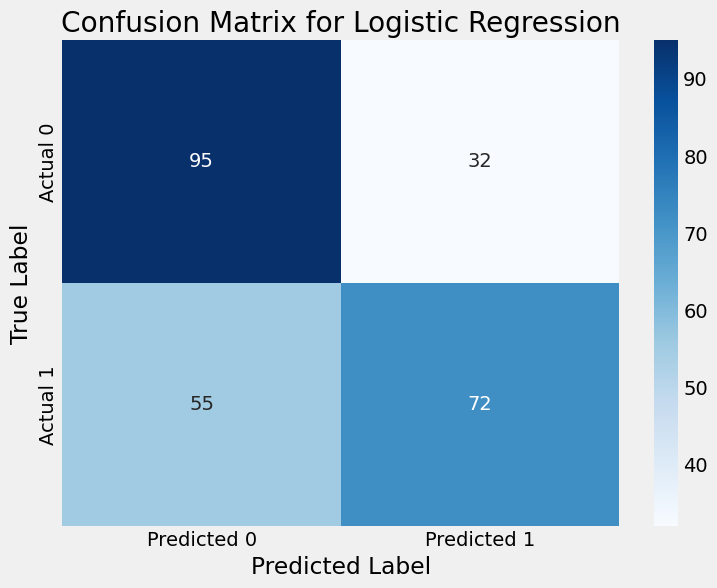

In [116]:
from sklearn.metrics import confusion_matrix

# Predict on the entire dataset
y_pred_all = log_model.predict(X_res)

# Generate confusion matrix for the entire dataset
cm_all = confusion_matrix(y_res, y_pred_all)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Decision Trees

In [82]:
from sklearn.tree import DecisionTreeClassifier

#Fitting a decision tree with default hyper parameters
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')
print("Training accuracy: ",tree.score(X_train,Y_train))
acc_score = accuracy_score(Y_test, pred_tree)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(Y_test, pred_tree)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(Y_test,pred_tree)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(Y_test,pred_tree)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  1.0
Testing accuracy:  0.5294117647058824
Confusion Matrix: 
 [[14  9]
 [15 13]]
ROC AUC score:  0.5364906832298137
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.61      0.54        23
           1       0.59      0.46      0.52        28

    accuracy                           0.53        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.54      0.53      0.53        51



SVM

In [88]:
from sklearn.model_selection import train_test_split

X_res = litob_combined[['Distance Umbos', 'LW_ratio', 'WH_ratio', 'UL_ratio', 'UH_ratio']]
y_res = litob_combined['Label']

X_train, X_test, y_train, y_test = train_test_split(X_res, np.ravel(y_res), test_size=0.2, random_state=42)

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# train the model on train set
model = SVC()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68        23
           1       0.80      0.43      0.56        28

    accuracy                           0.63        51
   macro avg       0.68      0.65      0.62        51
weighted avg       0.69      0.63      0.61        51



In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
logreg_accuracy_5 = accuracy_score(y_test, y_pred) * 100
logreg_precision_5 = precision_score(y_test, y_pred, average='macro') * 100
logreg_recall_5 = recall_score(y_test, y_pred, average='macro') * 100
logreg_f1_5 = f1_score(y_test, y_pred, average='macro') * 100

# Decision Tree
tree_accuracy_5 = accuracy_score(y_test, pred_tree) * 100
tree_precision_5 = precision_score(y_test, pred_tree, average='macro') * 100
tree_recall_5 = recall_score(y_test, pred_tree, average='macro') * 100
tree_f1_5 = f1_score(y_test, pred_tree, average='macro') * 100

# SVM
svm_accuracy_5 = accuracy_score(y_test, predictions) * 100
svm_precision_5 = precision_score(y_test, predictions, average='macro') * 100
svm_recall_5 = recall_score(y_test, predictions, average='macro') * 100
svm_f1_5 = f1_score(y_test, predictions, average='macro') * 100

# Create a DataFrame for the 5-feature results
data_5 = {'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
          'Accuracy (%)': [logreg_accuracy_5, tree_accuracy_5, svm_accuracy_5],
          'Precision (%)': [logreg_precision_5, tree_precision_5, svm_precision_5],
          'Recall (%)': [logreg_recall_5, tree_recall_5, svm_recall_5],
          'F1 Score (%)': [logreg_f1_5, tree_f1_5, svm_f1_5]}

results_df_5 = pd.DataFrame(data_5)

# Display the DataFrame
results_df_5

,Model,Accuracy (%),Precision (%),Recall (%),F1 Score (%)
0,Logistic Regression,72.549020,78.303571,74.611801,72.021944
1,Decision Tree,52.941176,53.683386,53.649068,52.923077
2,SVM,62.745098,67.777778,64.906832,61.805282


## **MODEL TRAINING (2 Features)**

Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_res = litob_combined[['Distance Umbos', 'WH_ratio']]
y_res = litob_combined['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [93]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

In [94]:
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test)
model_accuracy  = accuracy_score(y_pred,Y_test)
print("The Accuracy of simple logistic regression without hyperparmeter:",model_accuracy * 100)

The Accuracy of simple logistic regression without hyperparmeter: 68.62745098039215


In [95]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.91      0.72        23
           1       0.88      0.50      0.64        28

    accuracy                           0.69        51
   macro avg       0.74      0.71      0.68        51
weighted avg       0.75      0.69      0.68        51



Decision Trees

In [96]:
from sklearn.tree import DecisionTreeClassifier

#Fitting a decision tree with default hyper parameters
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')
print("Training accuracy: ",tree.score(X_train,Y_train))
acc_score = accuracy_score(Y_test, pred_tree)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(Y_test, pred_tree)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(Y_test,pred_tree)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(Y_test,pred_tree)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  1.0
Testing accuracy:  0.6274509803921569
Confusion Matrix: 
 [[15  8]
 [11 17]]
ROC AUC score:  0.6296583850931677
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.68      0.61      0.64        28

    accuracy                           0.63        51
   macro avg       0.63      0.63      0.63        51
weighted avg       0.63      0.63      0.63        51



SVM

In [98]:
from sklearn.model_selection import train_test_split

X_res = litob_combined[['Distance Umbos', 'WH_ratio']]
y_res = litob_combined['Label']

X_train, X_test, y_train, y_test = train_test_split(X_res, np.ravel(y_res), test_size=0.2, random_state=42)

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# train the model on train set
model = SVC()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.91      0.68        23
           1       0.83      0.36      0.50        28

    accuracy                           0.61        51
   macro avg       0.69      0.64      0.59        51
weighted avg       0.70      0.61      0.58        51



In [100]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [101]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [102]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69        23
           1       0.77      0.61      0.68        28

    accuracy                           0.69        51
   macro avg       0.70      0.69      0.69        51
weighted avg       0.70      0.69      0.69        51



In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
logreg_accuracy_2 = accuracy_score(y_test, y_pred) * 100
logreg_precision_2 = precision_score(y_test, y_pred, average='macro') * 100
logreg_recall_2 = recall_score(y_test, y_pred, average='macro') * 100
logreg_f1_2 = f1_score(y_test, y_pred, average='macro') * 100

# Decision Tree
tree_accuracy_2 = accuracy_score(y_test, pred_tree) * 100
tree_precision_2 = precision_score(y_test, pred_tree, average='macro') * 100
tree_recall_2 = recall_score(y_test, pred_tree, average='macro') * 100
tree_f1_2 = f1_score(y_test, pred_tree, average='macro') * 100

# SVM
svm_accuracy_2 = accuracy_score(y_test, grid_predictions) * 100
svm_precision_2 = precision_score(y_test, grid_predictions, average='macro') * 100
svm_recall_2 = recall_score(y_test, grid_predictions, average='macro') * 100
svm_f1_2 = f1_score(y_test, grid_predictions, average='macro') * 100

# Create a DataFrame for the 2-feature results
data_2 = {'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
          'Accuracy (%)': [logreg_accuracy_2, tree_accuracy_2, svm_accuracy_2],
          'Precision (%)': [logreg_precision_2, tree_precision_2, svm_precision_2],
          'Recall (%)': [logreg_recall_2, tree_recall_2, svm_recall_2],
          'F1 Score (%)': [logreg_f1_2, tree_f1_2, svm_f1_2]}

results_df_2 = pd.DataFrame(data_2)

# Display the DataFrame
results_df_2

,Model,Accuracy (%),Precision (%),Recall (%),F1 Score (%)
0,Logistic Regression,68.627451,73.750000,70.652174,68.025078
1,Decision Tree,62.745098,62.846154,62.965839,62.687717
2,SVM,68.627451,69.670846,69.487578,68.615385
